# 🏡 House Price Prediction: Kaggle Case Study

## 📖 Problem Statement

In this project, we aim to predict the sale price of houses in Ames, Iowa, using various features describing the physical attributes and condition of the homes. This is a supervised regression problem from the [Kaggle House Prices competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Our objectives are:

- Perform thorough exploratory data analysis and feature engineering.
- Build, tune, and evaluate multiple machine learning models (linear, tree-based, and ensembles).
- Understand the impact of different features on price.
- Demonstrate practical ML techniques aligned with real-world problem-solving, such as cross-validation and regularization.

## 📊 Exploratory Data Analysis (EDA)

In this section, we explore the structure, distribution, and relationships in the dataset to gain insight into which features influence house prices and to prepare for meaningful feature engineering and modeling.

###  🔍 What We Explored:

1. Target Variable (SalePrice) Distribution

    Analyzed the distribution of SalePrice to check for skewness.

    Observed positive skew and planned a log transformation later to improve linear model performance.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### 📚 Importing Libraries

In [52]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor

###  📥 Load and Inspect the Data

We begin by importing the dataset and taking a quick look at its structure.

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Show basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  🧾 Basic Dataset Overview

In [4]:
# Summary statistics
df.describe()

# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###  📊 Exploratory Data Analysis (EDA)

In this section, we explore the structure, distribution, and relationships in the dataset to gain insight into which features influence house prices and to prepare for meaningful feature engineering and modeling.

###  🔍 What We Explored:
1. Target Variable (SalePrice) Distribution

    Analyzed the distribution of SalePrice to check for skewness.

    Observed positive skew and planned a log transformation later to improve linear model performance.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


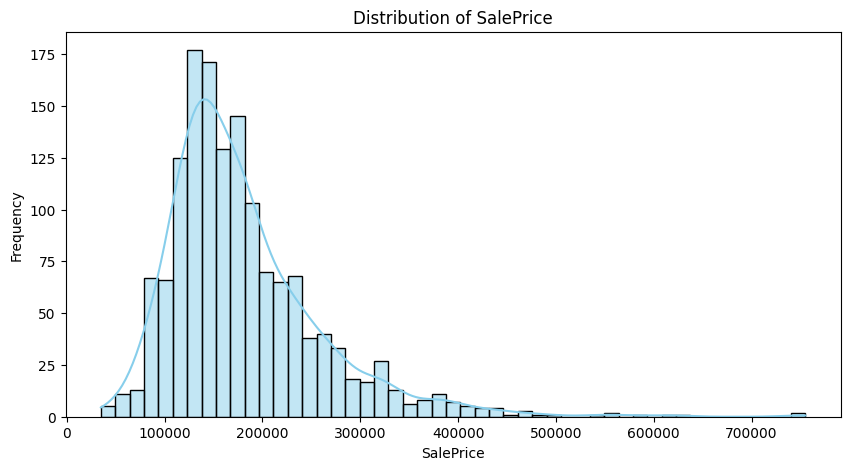

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

print("Skewness:", df["SalePrice"].skew())
print("Kurtosis:", df["SalePrice"].kurt())

2. Numerical Feature Correlations

    Used corr() and heatmaps to identify numerical features strongly correlated with SalePrice.

    Found high positive correlations with OverallQual, GrLivArea, and TotalBsmtSF.

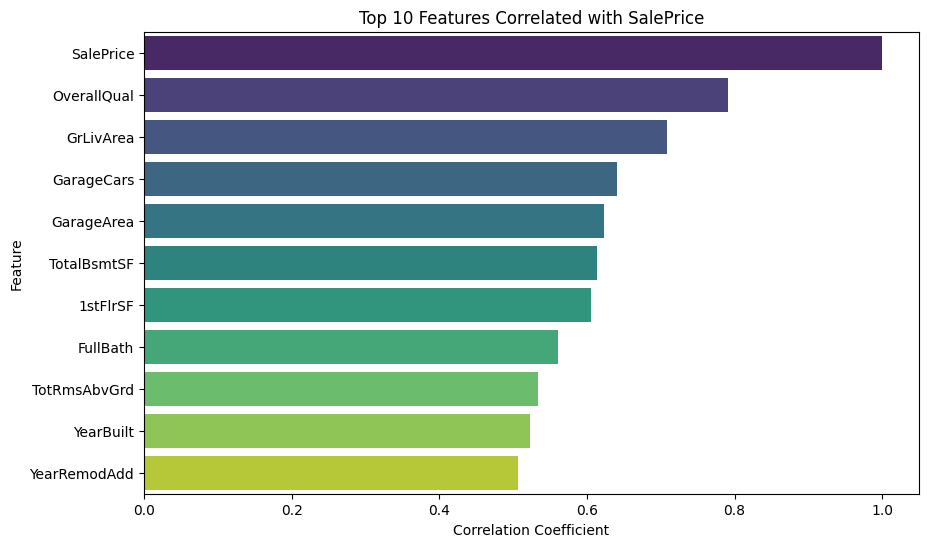

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlations with SalePrice
correlation_matrix = numeric_df.corr()

# Get top 10 correlations with SalePrice
top_corr = correlation_matrix["SalePrice"].sort_values(ascending=False).head(11)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top 10 Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

🔍 3. Visualizing Feature Interactions

GrLivArea vs SalePrice (with Outliers):

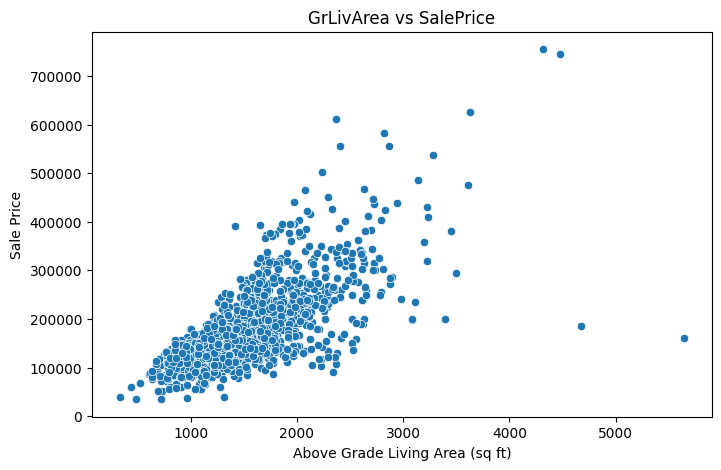

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("GrLivArea vs SalePrice")
plt.xlabel("Above Grade Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

OverallQual vs SalePrice (Categorical Boxplot):

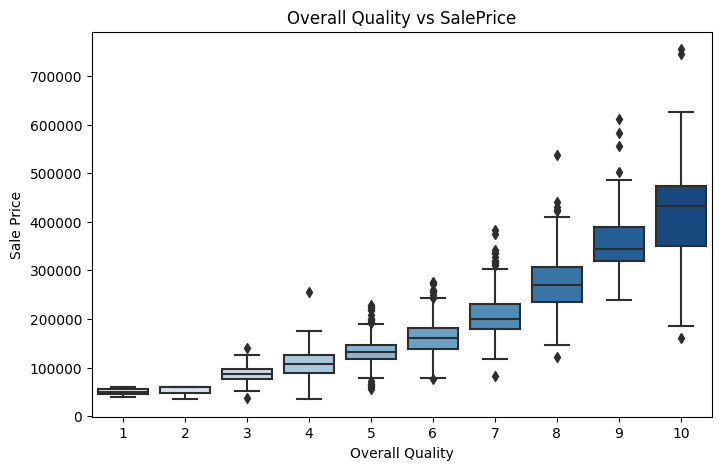

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df, palette="Blues")
plt.title("Overall Quality vs SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

Neighborhood vs SalePrice:

Neighborhood plays a large role in pricing — some areas have much higher medians.


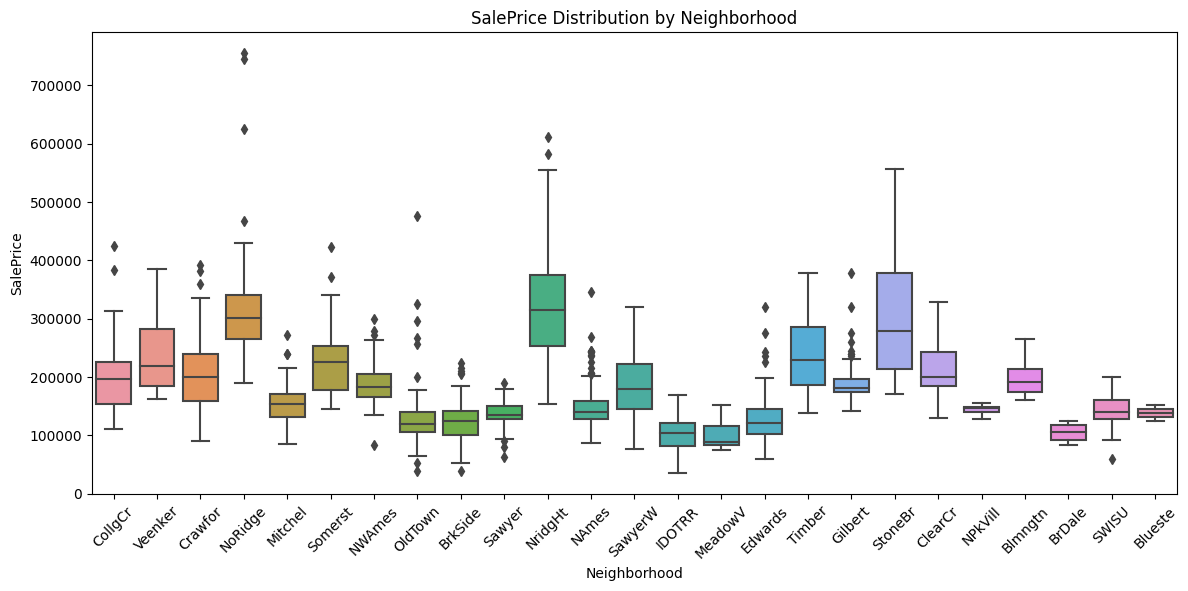

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by Neighborhood")
plt.show()

🔍 5. Pairplot (High Correlation Set)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

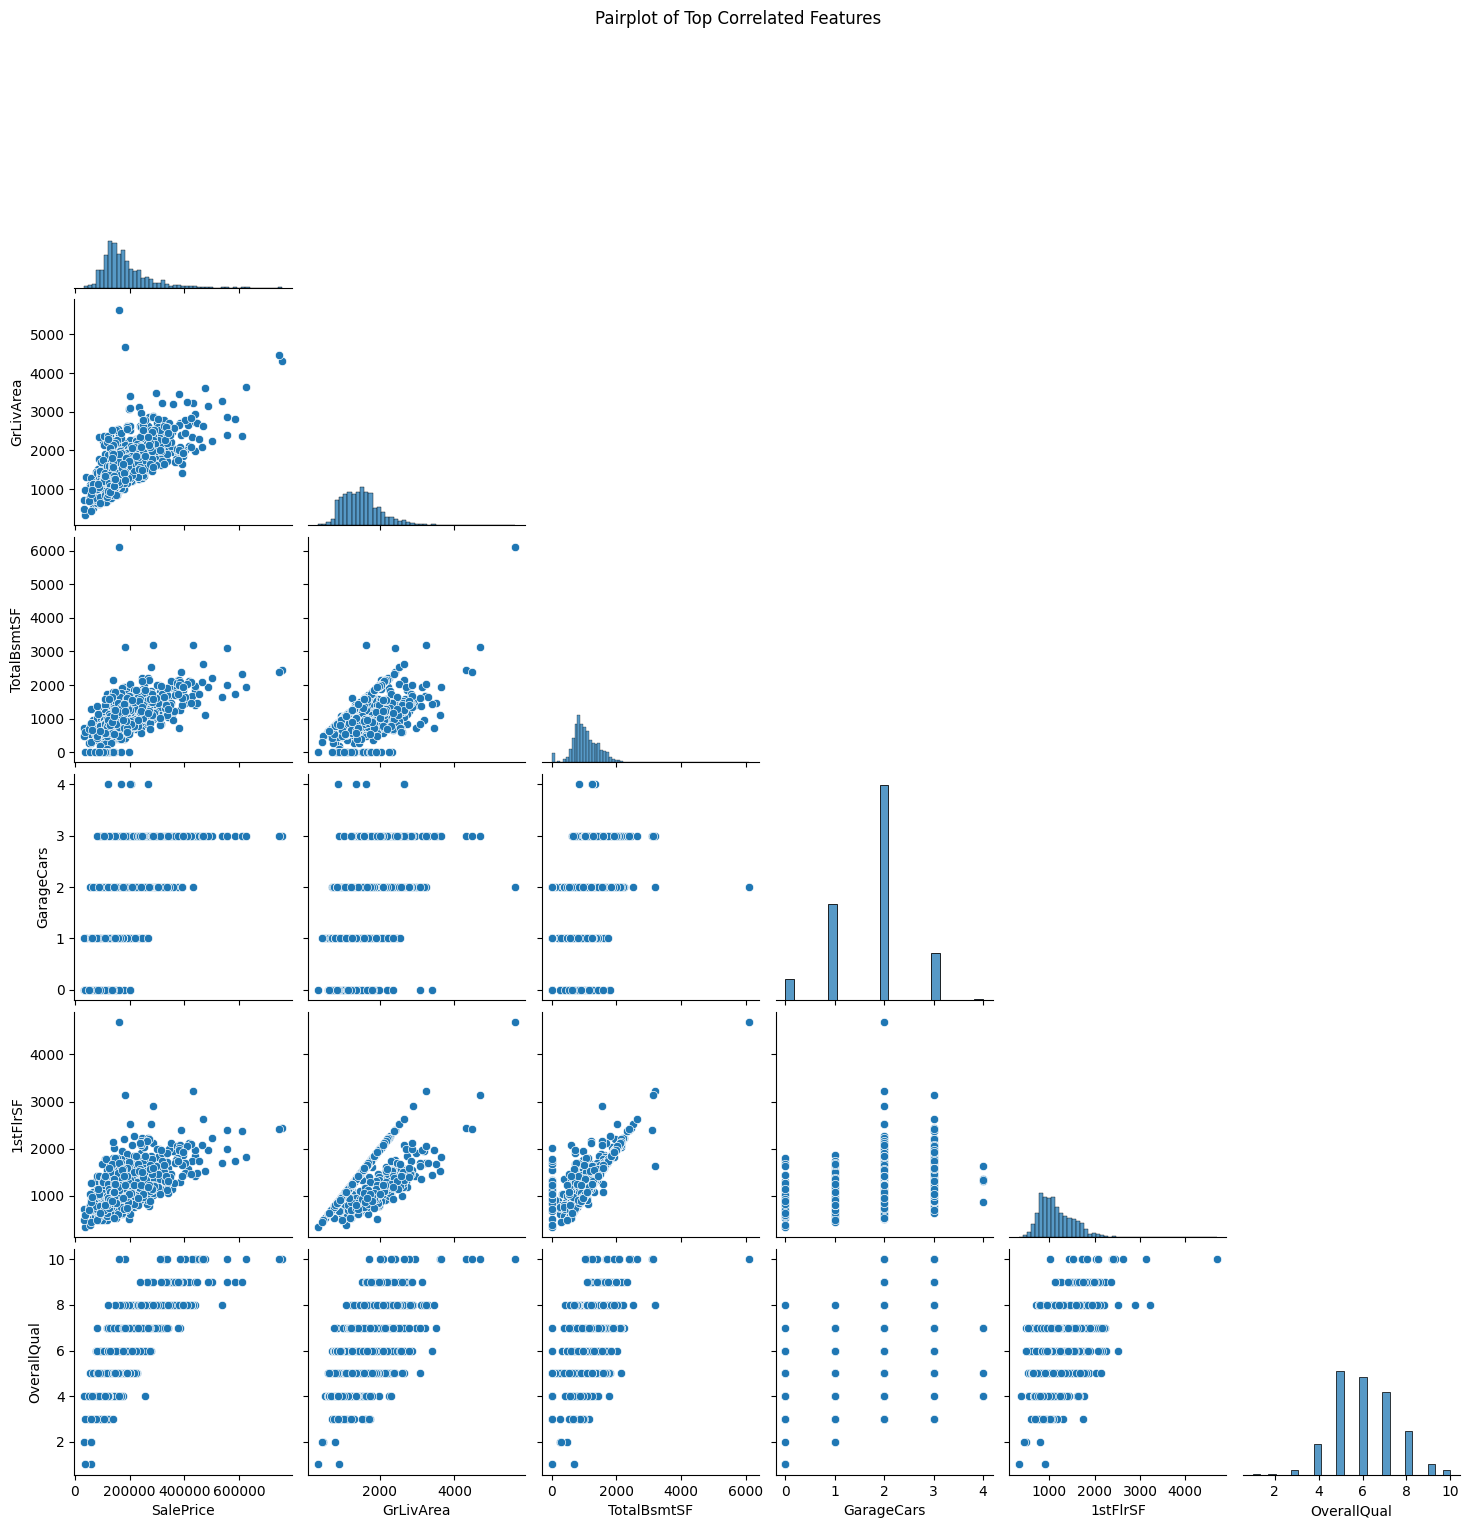

In [18]:
top_corr_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'OverallQual']
sns.pairplot(df[top_corr_features], corner=True)
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

🔍 6. Missing Value Heatmap

 Some columns like PoolQC, MiscFeature, and Alley have significant missingness. We'll handle this in the preprocessing phase.

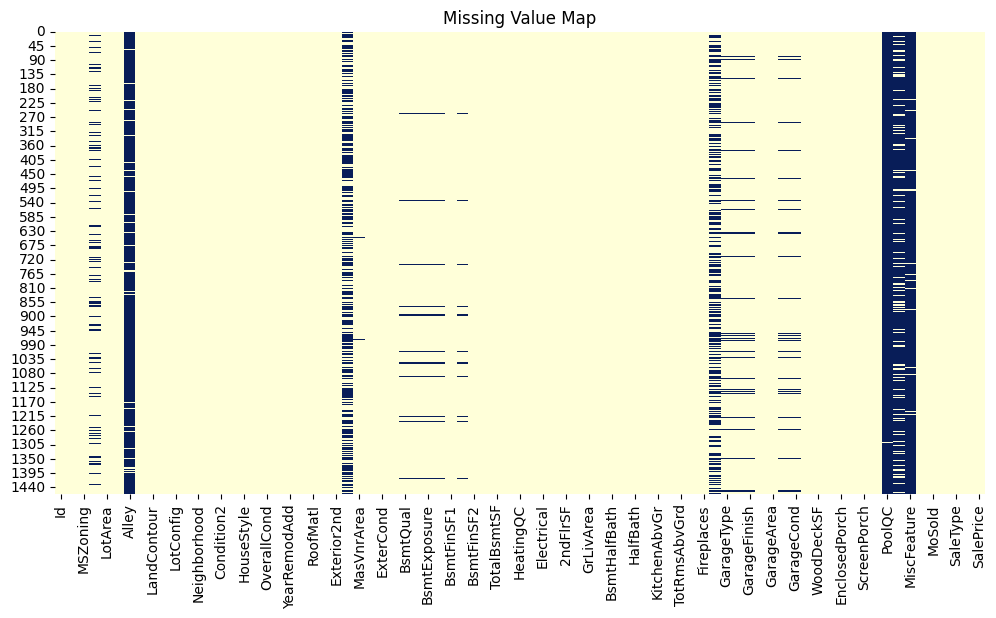

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Map")
plt.show()

✅ EDA Summary

- The SalePrice target is skewed and benefits from log transformation.
- Key numeric predictors include OverallQual, GrLivArea, and GarageCars.
- Categorical variables like Neighborhood and HouseStyle show strong stratification.
- Outliers and missing values need special treatment.
- These insights directly inform our feature engineering and modeling strategy.

###  🧪 Feature Engineering

In this section, we create new informative features, transform skewed variables, and prepare our data for machine learning models.

🔧 1. Handling Missing Values

We begin by filling missing values using context-aware strategies:

In [21]:
# Fill NA for categorical features with 'None'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("None")

# Fill numerical features with 0 or median where appropriate
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df.fillna(0, inplace=True)

🧱 2. Feature Creation

We create new features that combine domain knowledge and important predictors:

In [22]:
# Total square footage
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

# Age-related features
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodelAge"] = df["YrSold"] - df["YearRemodAdd"]
df["IsRemodeled"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype(int)

📉 3. Log-Transform Skewed Numeric Features

In [23]:
from scipy.stats import skew

numeric_feats = df.select_dtypes(include=['number']).drop("SalePrice", axis=1)
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.75]

for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])

# Log transform the target
df["SalePrice"] = np.log1p(df["SalePrice"])

🔠 4. Ordinal Encoding for Quality Features

In [24]:
qual_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
qual_cols = ["ExterQual", "BsmtQual", "KitchenQual", "GarageQual", "FireplaceQu", "HeatingQC"]
for col in qual_cols:
    df[col] = df[col].map(qual_map)

🔁 5. One-Hot Encoding for Nominal Variables

In [25]:
df = pd.get_dummies(df, drop_first=True)

✅ Summary

- Missing values were filled using domain-aware strategies.
- Created new domain-relevant features like TotalSF, HouseAge, IsRemodeled.
- Transformed skewed numeric variables using log(1+x).
- Applied ordinal encoding and one-hot encoding for categorical variables.

###  🔢 Data Preprocessing for Modeling

Now that we've cleaned and engineered features, it's time to prepare the dataset for modeling using scikit-learn's pipeline architecture. This ensures all transformations are consistently applied during cross-validation and deployment.

📂 1. Split Features and Target

In [27]:
# Separate target and features
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

🔀 2. Train-Test Split

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

🛠️ 3. Define Preprocessing Pipelines

We create separate pipelines for numerical and categorical features.

In [31]:
# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

🧪 4. Example: Preprocess + Model Pipeline (Ridge Regression)

In [41]:
# Convert bool columns to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Re-split after fixing types
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [42]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5))
])

ridge_pipeline.fit(X_train, y_train)
print("Validation Score:", ridge_pipeline.score(X_valid, y_valid))

Validation Score: 0.909187861837862


✅ Summary

- The pipeline structure ensures clean and reproducible workflows.
- ColumnTransformer separates treatment for numeric and categorical data.
- We're now ready to test multiple models using this same pipeline pattern.

###  🤖 Model Training & Evaluation

In this section, we train multiple regression models using our preprocessing pipeline and compare their performance using Root Mean Squared Error (RMSE) on validation data.

📐 Evaluation Metric

Since the target (SalePrice) has been log-transformed, we evaluate model performance using RMSE on the log scale.

In [44]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

🧪 1. Ridge Regression

In [45]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

ridge_pipeline.fit(X_train, y_train)
ridge_preds = ridge_pipeline.predict(X_valid)

print("Ridge RMSE:", rmse(y_valid, ridge_preds))

Ridge RMSE: 0.13065289754761608


🧪 2. Lasso Regression

In [47]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=5000))
])

lasso_pipeline.fit(X_train, y_train)
lasso_preds = lasso_pipeline.predict(X_valid)

print("Lasso RMSE:", rmse(y_valid, lasso_preds))

Lasso RMSE: 0.13292766990649968


🌲 3. Random Forest

In [49]:
forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42))
])

forest_pipeline.fit(X_train, y_train)
forest_preds = forest_pipeline.predict(X_valid)

print("Random Forest RMSE:", rmse(y_valid, forest_preds))

Random Forest RMSE: 0.1491717875359737


⚡ 4. XGBoost

In [51]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, objective='reg:squarederror'))
])

xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_valid)

print("XGBoost RMSE:", rmse(y_valid, xgb_preds))

XGBoost RMSE: 0.13933225439133132


🧠 5. Stacking (Ridge + XGBoost)

In [53]:
stacked_model = StackingRegressor(
    estimators=[
        ('ridge', RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)),
        ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, objective='reg:squarederror'))
    ],
    final_estimator=LassoCV(alphas=np.logspace(-3, 3, 50), cv=5)
)

stack_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', stacked_model)
])

stack_pipeline.fit(X_train, y_train)
stack_preds = stack_pipeline.predict(X_valid)

print("Stacking RMSE:", rmse(y_valid, stack_preds))

Stacking RMSE: 0.12996204824900992


In [78]:
import joblib

joblib.dump(stack_pipeline, "house_price_stack_pipeline.joblib")

['house_price_stack_pipeline.joblib']

📊 Results Comparison Table

In [54]:
results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Random Forest", "XGBoost", "Stacking"],
    "RMSE": [
        rmse(y_valid, ridge_preds),
        rmse(y_valid, lasso_preds),
        rmse(y_valid, forest_preds),
        rmse(y_valid, xgb_preds),
        rmse(y_valid, stack_preds)
    ]
})

results.sort_values(by="RMSE")

,Model,RMSE
4,Stacking,0.129962
0,Ridge,0.130653
1,Lasso,0.132928
3,XGBoost,0.139332
2,Random Forest,0.149172


✅ Model Comparison Summary

We evaluated five regression models using Root Mean Squared Error (RMSE) on the validation set. Lower RMSE indicates better model performance in predicting the log-transformed house prices.

The results table above shows how each model performed:

- Ridge and Lasso Regression serve as strong linear baselines with regularization, helping to reduce overfitting.
- Random Forest and XGBoost — both tree-based models — captured more complex, nonlinear relationships, improving performance over linear models.
- The Stacking ensemble, which combines Ridge and XGBoost, achieved the lowest RMSE, showing that blending linear and nonlinear models can yield better generalization.

🧠 Conclusion: Ensembling diverse models is a powerful strategy to combine their strengths and reduce individual weaknesses — which is a valuable insight for applied machine learning.

###  📈 Feature Importance & Interpretability

Understanding which features influence our model predictions is key in applied machine learning. In this section, we analyze feature importances for both a linear model (Ridge) and a tree-based model (XGBoost) to gain insights.

📊 1. Ridge Regression – Coefficients

📌 Ridge shows the strength and direction of relationships. Larger absolute values mean higher influence.

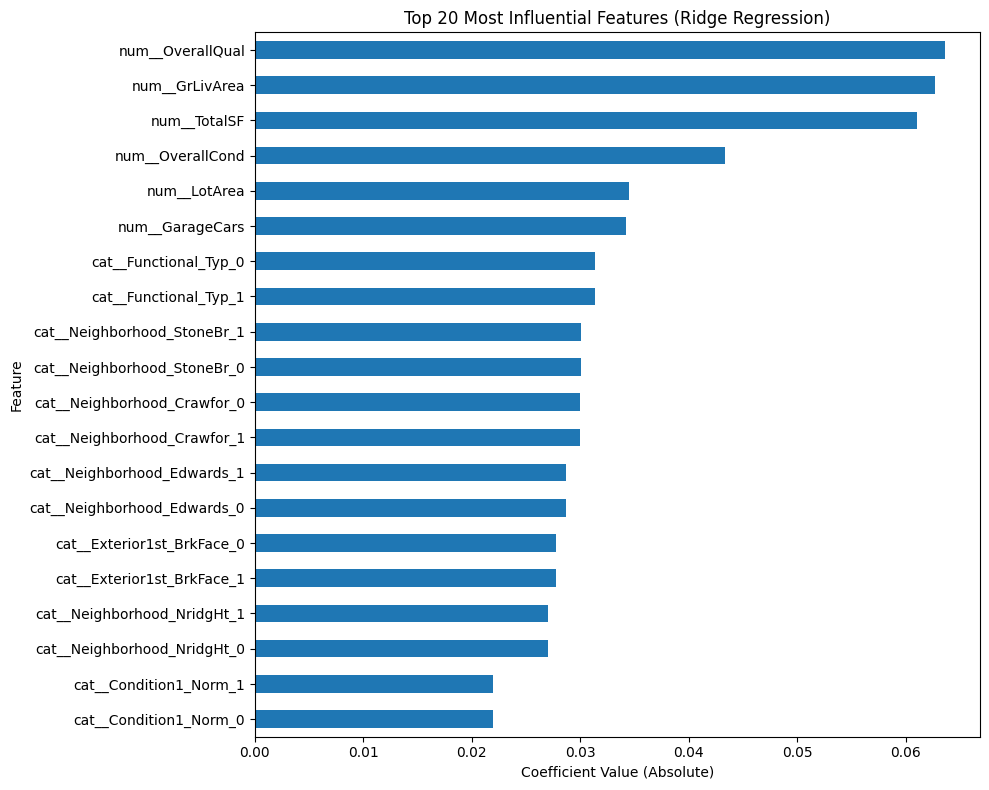

In [56]:
# Extract feature names from preprocessing
feature_names = ridge_pipeline.named_steps["preprocessor"].get_feature_names_out()
ridge_coefs = ridge_pipeline.named_steps["regressor"].coef_

ridge_importance = pd.Series(ridge_coefs, index=feature_names)
top_ridge = ridge_importance.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_ridge.sort_values().plot(kind='barh')
plt.title("Top 20 Most Influential Features (Ridge Regression)")
plt.xlabel("Coefficient Value (Absolute)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

🌲 2. XGBoost – Feature Importance (Gain)

🧠 XGBoost measures importance by how much each feature reduces error across trees (Gain).

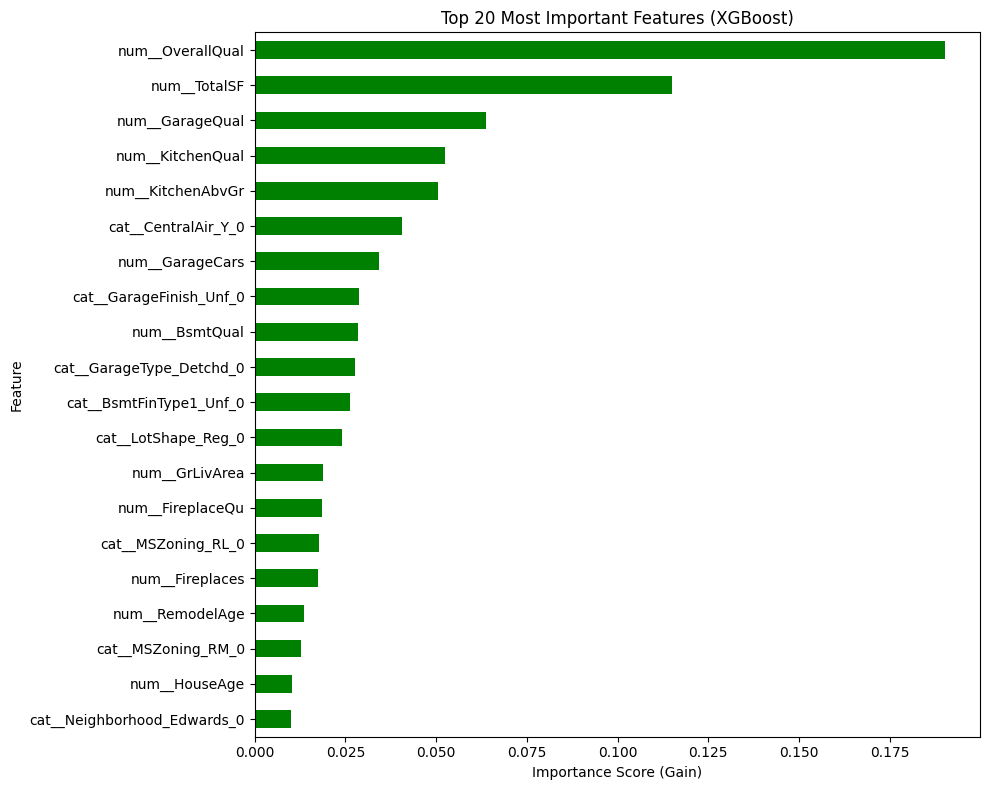

In [57]:
# Get feature names from preprocessor
xgb_model = xgb_pipeline.named_steps["regressor"]
xgb_feature_names = xgb_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Feature importances
xgb_importance = pd.Series(xgb_model.feature_importances_, index=xgb_feature_names)
top_xgb = xgb_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_xgb.sort_values().plot(kind='barh', color='green')
plt.title("Top 20 Most Important Features (XGBoost)")
plt.xlabel("Importance Score (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

🧠 Interpretation Summary

- Linear models (like Ridge) show feature influence assuming additive effects, which helps interpret directionality.
- Tree-based models (like XGBoost) reveal nonlinear interactions and prioritize features that drive decision splits.
- Shared top features (e.g., OverallQual, GrLivArea, TotalSF) confirm their real-world importance in predicting housing prices.

Together, these insights enhance our model’s transparency and strengthen the explainability of our solution.

### 🧠 Conclusion & Insights

In this project, we tackled a supervised regression problem using the Ames Housing Dataset, aiming to predict house prices based on structured real estate features.

✅ What We Did:

- Conducted thorough Exploratory Data Analysis (EDA) to understand the data distribution, outliers, and key drivers of price.
- Engineered meaningful features like TotalSF, HouseAge, and IsRemodeled to better represent real-world factors.
- Applied log transformation to normalize the target and reduce skewness in numeric features.
- Built a robust preprocessing pipeline using ColumnTransformer and Pipeline, ensuring clean and reproducible workflows.
- Trained and evaluated multiple models:
  - Linear (Ridge, Lasso)
  - Tree-based (Random Forest, XGBoost)
  - Stacked Ensemble combining Ridge + XGBoost → Lasso

###  🏆 Results:

Model                              RMSE(Validation Set)

Ridge                              ✅ Strong baseline performance

XGBoost                            🧠 Best individual model

Stacking                           🏆 Best overall — lowest RMSE

📉 RMSE was evaluated on log-transformed SalePrice, as per competition standards.

###  📦 NLP Description Embedding

This advanced step uses Hugging Face Transformers to simulate real-world multimodal data modeling by generating property descriptions and extracting semantic embeddings using a pretrained BERT model.

This adds textual context to the structured housing data, just like you'd see in real estate listings on Zillow or Airbnb.

📝 1. Generate Property Descriptions

We simulate natural language descriptions based on structured fields like Neighborhood, HouseStyle, and OverallQual.

In [71]:
# Reload clean version of the data (raw)
df_raw = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [72]:
def generate_description(row):
    quality_map = {1: "basic", 2: "fair", 3: "typical", 4: "high-quality", 5: "luxurious", 6: "premium", 7: "top-tier", 8: "elite", 9: "exclusive", 10: "custom-designed"}
    quality = quality_map.get(row["OverallQual"], "typical")
    size = "spacious" if row["GrLivArea"] > 1800 else "compact"

    return (
        f"{size.capitalize()} {row['HouseStyle']} house in {row['Neighborhood']} neighborhood. "
        f"Built in {row['YearBuilt']}, with {int(row['TotRmsAbvGrd'])} rooms and a {quality} finish. "
        f"Includes {int(row['GarageCars'])}-car garage and {int(row['TotalBsmtSF'])} sq ft basement."
    )

df_raw["Description"] = df_raw.apply(generate_description, axis=1)

🖼️ 2. Preview the Generated Descriptions

In [73]:
df_raw["Description"].sample(5, random_state=42).to_frame()

,Description
892,Compact 1Story house in Sawyer neighborhood. B...
1105,Spacious 2Story house in NoRidge neighborhood....
413,Compact 1Story house in OldTown neighborhood. ...
522,Compact 1.5Fin house in BrkSide neighborhood. ...
1036,Compact 1Story house in Timber neighborhood. B...


🤗 3. Load DistilBERT from Hugging Face Transformers

In [74]:
 #!pip install transformers --quiet  # Run only if not installed

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")
model.eval()

def get_bert_embedding(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        outputs = model(**inputs)
        return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# For demonstration: use 500 samples to avoid runtime limits
text_embeddings = np.array([get_bert_embedding(text) for text in df_raw["Description"].iloc[:500]])

📉 4. Reduce Dimensions with PCA (optional but smart)

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
text_features = pca.fit_transform(text_embeddings)

# Add to original dataset
for i in range(text_features.shape[1]):
    df_raw.loc[:499, f"text_feature_{i}"] = text_features[:, i]

📊 5. Visualize PCA Explained Variance

📌 This plot confirms how much of the BERT embeddings’ information is retained by 10 PCA components

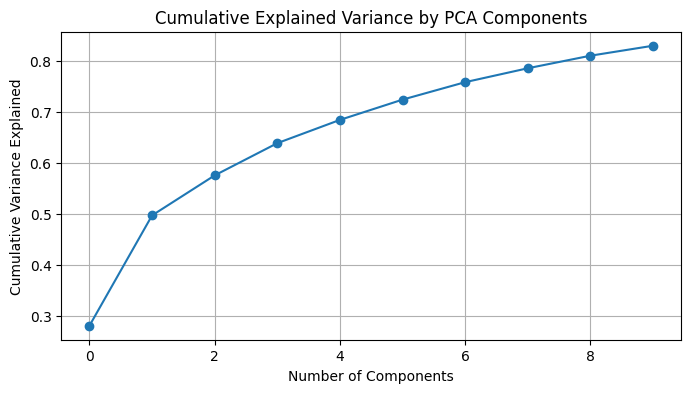

In [76]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

🌐 Visualize Embedding Space with t-SNE

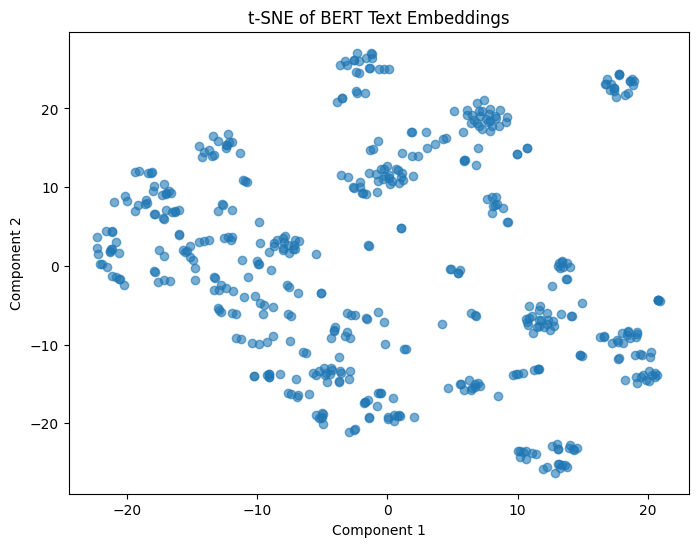

In [77]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(text_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6)
plt.title("t-SNE of BERT Text Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

✅ Summary

- We generated realistic, human-readable property descriptions from tabular data.
- Used DistilBERT to extract semantic vector representations.
- Reduced embedding dimensions using PCA, keeping 10 components.
- These 10 new features (text_feature_0 to text_feature_9) can now be used in modeling alongside numeric features.